In [ ]:
# coding: utf-8
# MNIST範例

In [2]:
# 匯入keras
import keras

In [3]:
# 除了MNIST資料之外，也匯入必要的模組
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger
# % matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# 定義批次大小、類別數、epoch數
batch_size = 128
num_classes = 10
epochs = 20

In [5]:
# 讀取MNIST資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()

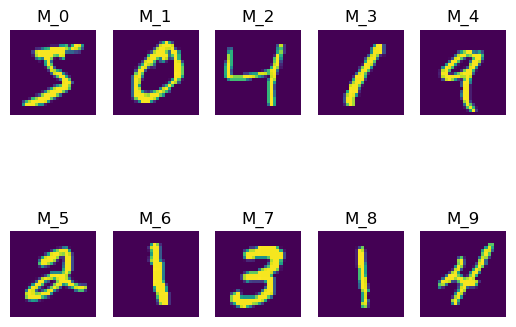

In [6]:
# 只顯示MNIST資料裡的10張
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("M_%d" %i)
    plt.axis("off")
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)
plt.show()

In [7]:
# 將影像尺寸正規化
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
# 顯示以確認
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [9]:
# 製作模型
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [10]:
# 輸出摘要
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5

In [11]:
# 編譯模型
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')
hist = model.fit(x_train, y_train,
                batch_size = batch_size,
                epochs=epochs,
                verbose=1,
                validation_split=0.1,
                callbacks=[es, csv_logger])

Epoch 1/20
422/422 [==============================] - 4s 9ms/step - loss: 0.2630 - accuracy: 0.9188 - val_loss: 0.0917 - val_accuracy: 0.9712
Epoch 2/20
422/422 [==============================] - 3s 8ms/step - loss: 0.1075 - accuracy: 0.9677 - val_loss: 0.0835 - val_accuracy: 0.9748
Epoch 3/20
422/422 [==============================] - 4s 8ms/step - loss: 0.0778 - accuracy: 0.9760 - val_loss: 0.0704 - val_accuracy: 0.9800
Epoch 4/20
422/422 [==============================] - 3s 8ms/step - loss: 0.0625 - accuracy: 0.9806 - val_loss: 0.0729 - val_accuracy: 0.9798
Epoch 5/20
422/422 [==============================] - 4s 8ms/step - loss: 0.0510 - accuracy: 0.9841 - val_loss: 0.0695 - val_accuracy: 0.9812
Epoch 6/20
422/422 [==============================] - 3s 8ms/step - loss: 0.0432 - accuracy: 0.9863 - val_loss: 0.0747 - val_accuracy: 0.9835
Epoch 7/20
422/422 [==============================] - 3s 8ms/step - loss: 0.0390 - accuracy: 0.9883 - val_loss: 0.0772 - val_accuracy: 0.9822


In [12]:
# 進行學習
score = model.evaluate(x_test, y_test)
print('test loss:', score[0])
print('test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0857 - accuracy: 0.9806: 0s - loss: 0.1166 - accura
test loss: 0.08568283170461655
test accuracy: 0.9805999994277954


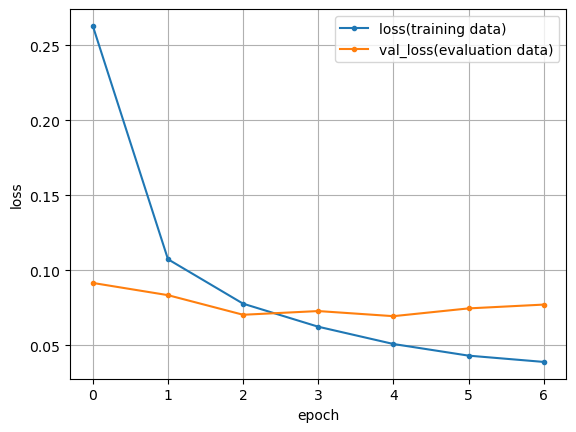

In [13]:
# 顯示學習結果
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss(training data)')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss(evaluation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()